In [349]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches

from ete3 import NCBITaxa
from Bio import SeqIO
import taxoniq
import marisa_trie

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [350]:
ncbi = NCBITaxa()

In [351]:
#ncbi.update_taxonomy_database()

In [352]:
# INPUT FILES
#this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000_RUN_SEPT25' # good for NT and NR 
#this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'
this_iteration = 'NCBI DB Compression-2023-09-15-nt-0-7-nr-0-7-scaled-100'
current_db = 'nt'

old_taxon_counts = "./data/BASELINE/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__27091_taxon_report.csv"
new_taxon_counts = "./data/NEW/" + this_iteration + "/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.nycsm_27095_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.nycsm_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.soil_27094_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.soil_report.csv"

#old_taxon_counts = "./data/BASELINE/atcc_even_27093_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/atcc_even_report.csv"

#old_taxon_counts = "./data/BASELINE/atcc_staggered_27092_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/atcc_staggered_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.7_27101_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.7_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.buccal_27100_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.buccal_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.gut_27098_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.gut_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.hous1_27097_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.hous1_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.hous2_27096_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.hous2_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.cityparks_report.csv"

# this one, with iteration = db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060...
# shows the issue with NT having extra non-genus-specific reads with bad alignment info
#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.cityparks_report.csv"

#petshop
#old_taxon_counts = "./data/petshop/PCOQ_12dpf_S4_report.csv"
#new_taxon_counts = "./data/petshop/PCOQ_12dpf_S4_459131_reads_nh_report.csv"


In [353]:
old_df = pd.read_csv(old_taxon_counts)
new_df = pd.read_csv(new_taxon_counts)

old_df.head()

tax_id  tax_level  genus_tax_id                            name  \
0   12059          2         12059                     Enterovirus   
1  463676          1         12059                    Rhinovirus C   
2   11646          2         11646                      Lentivirus   
3   11676          1         11646  Human immunodeficiency virus 1   
4   11019          2         11019                      Alphavirus   

           common_name category  is_phage     agg_score  max_z_score  \
0                  NaN  viruses     False  1.296063e+09        100.0   
1                  NaN  viruses     False  1.296063e+09        100.0   
2                  NaN  viruses     False  1.287362e+09        100.0   
3                  NaN  viruses     False  1.287362e+09        100.0   
4  arboviruses group A  viruses     False  1.279746e+09        100.0   

   nt_z_score  ...  nr_contig_r  nr_percent_identity  nr_alignment_length  \
0       100.0  ...       8420.0             100.0000              2147.00   
1       100.0  ...       8420.0             100.0000              2147.00   
2        99.0  ...       8384.0              99.8997              1000.48   
3       100.0  ...       8384.0              99.8997              1000.48   
4       100.0  ...       8314.0              99.9190              2474.00   

    nr_e_value  nr_bg_mean  nr_bg_stdev nr_bg_mean_mass_normalized  \
0  10^-307.653         NaN          NaN                        NaN   
1  10^-307.653         NaN          NaN                        NaN   
2    10^-306.9         NaN          NaN                        NaN   
3    10^-306.9         NaN          NaN                        NaN   
4  10^-307.653         NaN          NaN                        NaN   

   nr_bg_stdev_mass_normalized  species_tax_ids  known_pathogen  
0                          NaN         [463676]               1  
1                          NaN              NaN               1  
2                          NaN          [11676]               0  
3                          NaN              NaN               0  
4                          NaN          [37124]               1  

[5 rows x 35 columns]

In [354]:
new_df.head()

tax_id  tax_level  genus_tax_id                          name common_name  \
0  2803850          2       2803850                Mammaliicoccus         NaN   
1    42858          1       2803850         Mammaliicoccus lentus         NaN   
2  2782231          2       2782231                     Kaistella         NaN   
3  1608584          1       2782231  Chryseobacterium senegalense         NaN   
4   421525          1       2782231     Chryseobacterium haifense         NaN   

   category  is_phage  agg_score  max_z_score  nt_z_score  ...  \
0  bacteria     False        NaN          NaN         NaN  ...   
1  bacteria     False        NaN          NaN         NaN  ...   
2  bacteria     False        NaN          NaN         NaN  ...   
3  bacteria     False        NaN          NaN         NaN  ...   
4  bacteria     False        NaN          NaN         NaN  ...   

   nr_alignment_length   nr_e_value  nr_bg_mean  nr_bg_stdev  \
0              41.0000  10^-15.7567         NaN          NaN   
1              41.0000  10^-15.7567         NaN          NaN   
2              40.8462  10^-17.3355         NaN          NaN   
3              42.0000  10^-16.4776         NaN          NaN   
4              40.7500   10^-17.407         NaN          NaN   

   nr_bg_mean_mass_normalized  nr_bg_stdev_mass_normalized    species_tax_ids  \
0                         NaN                          NaN            [42858]   
1                         NaN                          NaN                NaN   
2                         NaN                          NaN  [1608584, 421525]   
3                         NaN                          NaN                NaN   
4                         NaN                          NaN                NaN   

   known_pathogen  lcrp_pathogen  divergent_pathogen  
0               0              0                   0  
1               0              0                   0  
2               0              0                   0  
3               0              0                   0  
4               0              0                   0  

[5 rows x 37 columns]

In [355]:
old_df.columns

Index(['tax_id', 'tax_level', 'genus_tax_id', 'name', 'common_name',
       'category', 'is_phage', 'agg_score', 'max_z_score', 'nt_z_score',
       'nt_rpm', 'nt_count', 'nt_contigs', 'nt_contig_r',
       'nt_percent_identity', 'nt_alignment_length', 'nt_e_value',
       'nt_bg_mean', 'nt_bg_stdev', 'nt_bg_mean_mass_normalized',
       'nt_bg_stdev_mass_normalized', 'nr_z_score', 'nr_rpm', 'nr_count',
       'nr_contigs', 'nr_contig_r', 'nr_percent_identity',
       'nr_alignment_length', 'nr_e_value', 'nr_bg_mean', 'nr_bg_stdev',
       'nr_bg_mean_mass_normalized', 'nr_bg_stdev_mass_normalized',
       'species_tax_ids', 'known_pathogen'],
      dtype='object')

In [356]:
old_df = old_df[old_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]
new_df = new_df[new_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]

In [357]:
all_names = new_df['name']

new_names = []
for n in all_names:
    taxid = n.split()[-1]
    try:
        taxid2name = ncbi.get_taxid_translator([taxid])
        new_names.append(taxid2name[int(taxid)])        
    except:
        new_names.append("None")
        
new_df['fixed_name'] = new_df['name'] #new_names #only needed this "new_names" functionality when we had the bug with taxon names

In [358]:
old_df.columns

Index(['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm'], dtype='object')

In [359]:
#full_df = old_df.merge(new_df, how='outer', on='tax_id', suffixes = ['_new', '_old'])
full_df = pd.merge(left = old_df, right = new_df, how='outer', on='tax_id', suffixes = ['_old', '_new'])
#full_df = old_df.join(new_df, how='outer', on='tax_id', lsuffix = '_old', rsuffix = '_new')
full_df.head()

tax_id                        name_old    nt_rpm_old  nt_contigs_old  \
0   463676                    Rhinovirus C  64803.127790             1.0   
1    11676  Human immunodeficiency virus 1  64687.682788             1.0   
2    37124               Chikungunya virus  63987.316442             1.0   
3    11041                   Rubella virus  60108.364375             1.0   
4  1117645       Elizabethkingia anophelis  64056.583444            59.0   

     nr_rpm_old                        name_new    nt_rpm_new  nt_contigs_new  \
0  64803.127790                    Rhinovirus C  64803.127790             1.0   
1  64695.379121  Human immunodeficiency virus 1  64687.682788             1.0   
2  63987.316442               Chikungunya virus  63987.316442             1.0   
3  60108.364375                   Rubella virus  60108.364375             1.0   
4  53043.130253       Elizabethkingia anophelis  64056.583444            59.0   

     nr_rpm_new                      fixed_name  
0  64803.127790                    Rhinovirus C  
1  64695.379121  Human immunodeficiency virus 1  
2  63987.316442               Chikungunya virus  
3  60108.364375                   Rubella virus  
4  52096.481236       Elizabethkingia anophelis

In [360]:
full_df.dropna(subset=[(current_db+'_rpm_old'), (current_db+'_rpm_new')], how='all', inplace=True)
full_df['log_'+current_db+'_rpm_old'] = np.log(full_df[current_db+'_rpm_old'] + 1)
full_df['log_'+current_db+'_rpm_new'] = np.log(full_df[current_db+'_rpm_new'] + 1)

full_df.sort_values(by=current_db+'_rpm_old', ascending = False, inplace=True)
full_df.head()

tax_id                        name_old    nt_rpm_old  nt_contigs_old  \
103  1922926          Hubei mosquito virus 2  65311.085799             3.0   
180      573           Klebsiella pneumoniae  65180.248130            52.0   
0     463676                    Rhinovirus C  64803.127790             1.0   
1      11676  Human immunodeficiency virus 1  64687.682788             1.0   
4    1117645       Elizabethkingia anophelis  64056.583444            59.0   

       nr_rpm_old                        name_new    nt_rpm_new  \
103  44977.372780          Hubei mosquito virus 2  65311.085799   
180  57029.830989           Klebsiella pneumoniae  65180.248130   
0    64803.127790                    Rhinovirus C  64803.127790   
1    64695.379121  Human immunodeficiency virus 1  64687.682788   
4    53043.130253       Elizabethkingia anophelis  64056.583444   

     nt_contigs_new    nr_rpm_new                      fixed_name  \
103             3.0  33871.563587          Hubei mosquito virus 2   
180            52.0  57206.846658           Klebsiella pneumoniae   
0               1.0  64803.127790                    Rhinovirus C   
1               1.0  64695.379121  Human immunodeficiency virus 1   
4              59.0  52096.481236       Elizabethkingia anophelis   

     log_nt_rpm_old  log_nt_rpm_new  
103       11.086932       11.086932  
180       11.084927       11.084927  
0         11.079125       11.079125  
1         11.077342       11.077342  
4         11.067538       11.067538

In [361]:
full_df.fillna(0, inplace=True)
full_df['diff'] = full_df[current_db+'_rpm_old'] - full_df[current_db+'_rpm_new']
full_df['max_' + current_db + '_rpm'] = full_df[[current_db+'_rpm_old', current_db+'_rpm_new']].max(axis=1)
full_df['perc_diff'] = full_df['diff']/full_df['max_' + current_db+ '_rpm']

full_df.sort_values(by='diff', inplace=True)
top_diffs = full_df.head(5)
bottom_diffs = full_df.tail(5)

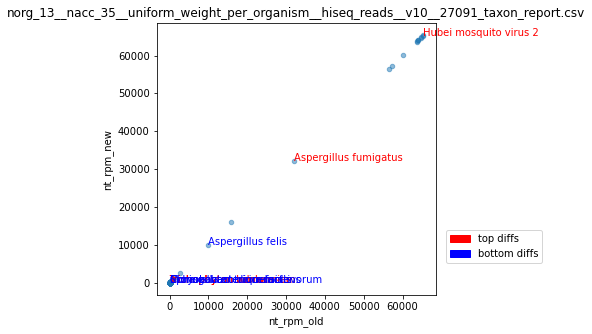

In [362]:
full_df.plot(kind='scatter', x = current_db + '_rpm_old', y = current_db+'_rpm_new', alpha = .5, figsize=(5,5))
plt.title(old_taxon_counts.split('/')[-1])
for i in top_diffs.index:
    plt.text(x = top_diffs.loc[i][current_db +'_rpm_old'], y = top_diffs.loc[i][current_db + '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
for i in bottom_diffs.index:
    plt.text(x = bottom_diffs.loc[i][current_db + '_rpm_old'], y = bottom_diffs.loc[i][current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color = 'blue')#, rotation=90)
    
patches = [mpatches.Patch(color='red', label='top diffs'), mpatches.Patch(color='blue', label='bottom diffs')]
plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))
    
#full_df.plot(kind='scatter', x = 'nt_rpm_old', y = 'nt_rpm_new', alpha = .5, figsize=(5,5))
#for i in top_diffs.index:
#    plt.text(x = top_diffs.loc[i]['nt_rpm_old'], y = top_diffs.loc[i]['nt_rpm_new'], s = top_diffs.loc[i]['fixed_name'], color = 'red')
#for i in bottom_diffs.index:
#    plt.text(x = bottom_diffs.loc[i]['nt_rpm_old'], y = bottom_diffs.loc[i]['nt_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color = 'blue')

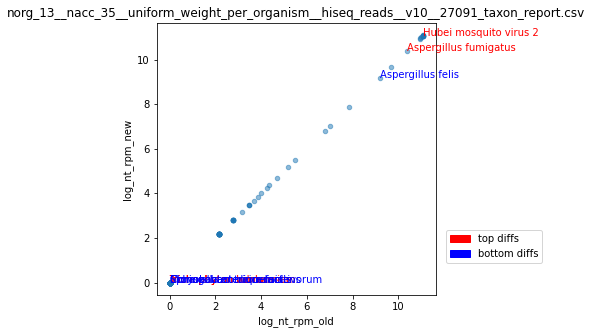

In [363]:
full_df.plot(kind='scatter', x = 'log_' +  current_db +'_rpm_old', y = 'log_' + current_db + '_rpm_new', alpha = .5, figsize=(5,5))
plt.title(old_taxon_counts.split('/')[-1])
for i in top_diffs.index:
    plt.text(x = top_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = top_diffs.loc[i]['log_' +  current_db+ '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
for i in bottom_diffs.index:
    plt.text(x = bottom_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = bottom_diffs.loc[i]['log_' + current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color='blue')
    
plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))

#full_df.plot(kind='scatter', x = 'log_nt_rpm_old', y = 'log_nt_rpm_new', alpha = .5, figsize=(5,5))
#for i in top_diffs.index:
#    plt.text(x = top_diffs.loc[i]['log_nt_rpm_old'], y = top_diffs.loc[i]['log_nt_rpm_new'], s = top_diffs.loc[i]['fixed_name'], color='red') #'fixed_name'
#for i in bottom_diffs.index:
#    plt.text(x = bottom_diffs.loc[i]['log_nt_rpm_old'], y = bottom_diffs.loc[i]['log_nt_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color='blue')

In [364]:
top_diffs

tax_id                 name_old    nt_rpm_old  nt_contigs_old  \
18    746128    Aspergillus fumigatus  32101.406890             0.0   
103  1922926   Hubei mosquito virus 2  65311.085799             3.0   
174     5551      Trichophyton rubrum      0.000000             0.0   
173    63417  Trichophyton verrucosum      0.000000             0.0   
171    63400   Trichophyton benhamiae      0.000000             0.0   

       nr_rpm_old                 name_new    nt_rpm_new  nt_contigs_new  \
18   28584.182495    Aspergillus fumigatus  32124.495890             0.0   
103  44977.372780   Hubei mosquito virus 2  65311.085799             3.0   
174     15.392667      Trichophyton rubrum      0.000000             0.0   
173      7.696333  Trichophyton verrucosum      0.000000             0.0   
171      7.696333   Trichophyton benhamiae      0.000000             0.0   

       nr_rpm_new               fixed_name  log_nt_rpm_old  log_nt_rpm_new  \
18   28822.768833    Aspergillus fumigatus       10.376686       10.377405   
103  33871.563587   Hubei mosquito virus 2       11.086932       11.086932   
174     15.392667      Trichophyton rubrum        0.000000        0.000000   
173      7.696333  Trichophyton verrucosum        0.000000        0.000000   
171      7.696333   Trichophyton benhamiae        0.000000        0.000000   

       diff    max_nt_rpm  perc_diff  
18  -23.089  32124.495890  -0.000719  
103   0.000  65311.085799   0.000000  
174   0.000      0.000000        NaN  
173   0.000      0.000000        NaN  
171   0.000      0.000000        NaN

In [365]:
bottom_diffs

tax_id                     name_old   nt_rpm_old  nt_contigs_old  \
328      478    Moraxella nonliquefaciens     0.000000             0.0   
317  1241981      Chryseobacterium lactis     0.000000             0.0   
311    28454  Sphingobacterium multivorum     0.000000             0.0   
265   413502       Cronobacter turicensis     0.000000             0.0   
19   1287682            Aspergillus felis  9882.092171             1.0   

     nr_rpm_old                     name_new   nt_rpm_new  nt_contigs_new  \
328   15.392667    Moraxella nonliquefaciens     0.000000             0.0   
317   23.089000      Chryseobacterium lactis     0.000000             0.0   
311   38.481667  Sphingobacterium multivorum     0.000000             0.0   
265   38.481667       Cronobacter turicensis     0.000000             0.0   
19   307.853339            Aspergillus felis  9859.003171             1.0   

     nr_rpm_new                   fixed_name  log_nt_rpm_old  log_nt_rpm_new  \
328   15.392667    Moraxella nonliquefaciens        0.000000        0.000000   
317   23.089000      Chryseobacterium lactis        0.000000        0.000000   
311   38.481667  Sphingobacterium multivorum        0.000000        0.000000   
265   38.481667       Cronobacter turicensis        0.000000        0.000000   
19   292.460672            Aspergillus felis        9.198581        9.196242   

       diff   max_nt_rpm  perc_diff  
328   0.000     0.000000        NaN  
317   0.000     0.000000        NaN  
311   0.000     0.000000        NaN  
265   0.000     0.000000        NaN  
19   23.089  9882.092171   0.002336

In [366]:
new_organisms_df = full_df[full_df.nt_rpm_old == 0]
new_organisms_df.sort_values(by=current_db + '_rpm_new', ascending = False, inplace=True)
new_organisms_df

/Users/katrina.kalantar/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


tax_id                          name_old  nt_rpm_old  nt_contigs_old  \
174     5551               Trichophyton rubrum         0.0             0.0   
379  2027919  Enterobacter cloacae complex sp.         0.0             0.0   
367    82996               Serratia plymuthica         0.0             0.0   
380  1977566         Enterobacter sp. Crenshaw         0.0             0.0   
370    54291        Raoultella ornithinolytica         0.0             0.0   
..       ...                               ...         ...             ...   
194      571                Klebsiella oxytoca         0.0             0.0   
50    573508             Aspergillus cristatus         0.0             0.0   
196  1134687          Klebsiella michiganensis         0.0             0.0   
197      253      Chryseobacterium indologenes         0.0             0.0   
265   413502            Cronobacter turicensis         0.0             0.0   

     nr_rpm_old                          name_new  nt_rpm_new  nt_contigs_new  \
174   15.392667               Trichophyton rubrum         0.0             0.0   
379    7.696333  Enterobacter cloacae complex sp.         0.0             0.0   
367    7.696333               Serratia plymuthica         0.0             0.0   
380    7.696333         Enterobacter sp. Crenshaw         0.0             0.0   
370   23.089000        Raoultella ornithinolytica         0.0             0.0   
..          ...                               ...         ...             ...   
194   46.178001                Klebsiella oxytoca         0.0             0.0   
50    76.963335             Aspergillus cristatus         0.0             0.0   
196   76.963335          Klebsiella michiganensis         0.0             0.0   
197  261.675338      Chryseobacterium indologenes         0.0             0.0   
265   38.481667            Cronobacter turicensis         0.0             0.0   

     nr_rpm_new                        fixed_name  log_nt_rpm_old  \
174   15.392667               Trichophyton rubrum             0.0   
379    7.696333  Enterobacter cloacae complex sp.             0.0   
367   23.089000               Serratia plymuthica             0.0   
380    7.696333         Enterobacter sp. Crenshaw             0.0   
370   23.089000        Raoultella ornithinolytica             0.0   
..          ...                               ...             ...   
194   46.178001                Klebsiella oxytoca             0.0   
50    76.963335             Aspergillus cristatus             0.0   
196   76.963335          Klebsiella michiganensis             0.0   
197  315.549672      Chryseobacterium indologenes             0.0   
265   38.481667            Cronobacter turicensis             0.0   

     log_nt_rpm_new  diff  max_nt_rpm  perc_diff  
174             0.0   0.0         0.0        NaN  
379             0.0   0.0         0.0        NaN  
367             0.0   0.0         0.0        NaN  
380             0.0   0.0         0.0        NaN  
370             0.0   0.0         0.0        NaN  
..              ...   ...         ...        ...  
194             0.0   0.0         0.0        NaN  
50              0.0   0.0         0.0        NaN  
196             0.0   0.0         0.0        NaN  
197             0.0   0.0         0.0        NaN  
265             0.0   0.0         0.0        NaN  

[229 rows x 15 columns]

In [367]:
#overall correlation!
print(stats.spearmanr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))
print(stats.pearsonr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))

SpearmanrResult(correlation=1.0, pvalue=0.0)
(0.9999999875878658, 0.0)


In [381]:
#overall correlation!
x = (stats.spearmanr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))
y = (stats.pearsonr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))


0.9999999875878658

In [368]:
# correlation when removing the taxa that are new low-abundance hits -- this is higher, means that the doubling of "new taxa" (false-positives) is driving some of the spearman deviation
print(full_df.shape)
full_df2 = full_df[full_df.nt_rpm_old != 0]
print(full_df2.shape)
print(stats.spearmanr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))
print(stats.pearsonr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))

(285, 15)
(56, 15)
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
(0.9999999846869416, 1.4395103890835822e-204)


% increase in total taxa
0.0
      new  old
0      56   56
10     37   37
100    20   20
1000   16   16


Text(0.5, 1.0, 'Total Count of Hits, rPM > Threshold')

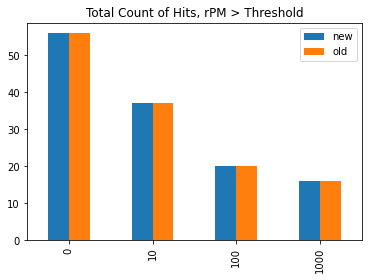

In [369]:
res = {}
for i in [0, 10, 100, 1000]:
    res[str(i)] = {}
    res[str(i)]['new'] = (full_df[current_db + '_rpm_new'] > i).sum()
    res[str(i)]['old'] = (full_df[current_db + '_rpm_old'] > i).sum()
    
    if i == 0:
        print("% increase in total taxa")
        print((res[str(i)]['new']-res[str(i)]['old'])/res[str(i)]['old'])
res_df = pd.DataFrame.from_dict(res, orient='index')
print(res_df)

res_df.plot.bar()
plt.title("Total Count of Hits, rPM > Threshold")

# Support Manual Inspection

given a file of reads
given a hitsummary from the other pipeline version (old, if reads come from new or new, if reads come from old)


In [370]:
#Enterococcus faecium reads from old sample...where did they go in new sample?
#taxon_contigs = "/Users/katrina.kalantar/Downloads/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__tax_490_contigs.fasta" 

'''old_blast_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.blast.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.blast.top.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.hitsummary2.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.blast.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.blast.top.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.hitsummary2.tab", sep='\t', header=None)
'''

'''old_blast_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.blast.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.blast.top.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.hitsummary2.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.blast.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.blast.top.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.hitsummary2.tab", sep='\t', header=None)
'''

'''taxon_reads = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.cityparks_taxon--100-hits_sept21.fasta"
old_blast_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.OLD.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.top.OLD.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/cityparks/cityparks.gsnap.hitsummary2.OLD.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.NEW.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.top.NEW.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/cityparks/cityparks.gsnap.hitsummary2.NEW.tab", sep='\t', header=None)
'''

# active investigation 9/25
taxon_contigs = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.nycsm_tax_1352_contigs.fasta"
taxon_reads = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.nycsm_enterococcus-faecium-hits.fasta"
old_blast_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.old.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.top.old.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/nycsm/gsnap.hitsummary2.old.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.new.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.top.new.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/nycsm/gsnap.hitsummary2.new.tab", sep='\t', header=None)


taxon_contigs = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.cityparks_tax_823_contigs.fasta"
old_blast_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.old.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.top.old.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/cityparks/gsnap.hitsummary2.old.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.new.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.top.new.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/cityparks/gsnap.hitsummary2.new.tab", sep='\t', header=None)


## TRYING TO LOOK INTO THIS ISSUE: https://czi-sci.slack.com/archives/C05BEKJM893/p1693407898881269

/Users/katrina.kalantar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [371]:
list_of_contig_ids = []
for record in SeqIO.parse(taxon_contigs, "fasta"):
    contig_id = record.id.split(':')[0]
    list_of_contig_ids.append(contig_id)

In [372]:
accession_to_taxid_trie = marisa_trie.RecordTrie("Q").mmap('./references/accession2taxid.marisa')

def add_taxon_names(df):
    taxid_list = []
    for i in list(df[1]):
        try:
            taxid = accession_to_taxid_trie[i.split('.')[0]][0][0]
            taxid2name = ncbi.get_taxid_translator([taxid])
            taxid_list.append(taxid2name[int(taxid)][0:26])             
        except:
            taxid_list.append('NA')
    df['taxid'] = taxid_list
    return(df)

def print_hits(contigs, blast_m8_new, blast_m8_old):

    for c in contigs[0:10]:
        print("\n" + c)
        try:
            
            sub_df_new = blast_m8_new[blast_m8_new[0] == c][[1, 2, 3, 11]].head(10)
            sub_df_new2 = add_taxon_names(sub_df_new)
            #print(sub_df_new2)

            sub_df_old = blast_m8_old[blast_m8_old[0] == c][[1, 2, 3, 11]].head(10)
            sub_df_old2 = add_taxon_names(sub_df_old)
            #print(sub_df_old2)

            top_taxid_new = sub_df_new2.head(1).iloc[0]['taxid']
            top_taxid_old = sub_df_old2.head(1).iloc[0]['taxid']

            print(top_taxid_new)
            print(top_taxid_old)

            if(top_taxid_new == top_taxid_old):
                print("same hit")
                #print("new:")
                #print(sub_df_new2.head(5))
                #print("old:")
                #print(sub_df_old.head(5))
            else:
                print("new:")
                print(sub_df_new2.head(5))
                print("old:")
                print(sub_df_old.head(5))
            #print(sub_df2)
            
        except:
            print("had an error")


In [373]:
print_hits(list_of_contig_ids, new_blast_m8_df, old_blast_m8_df) #show contig hits in new results


NODE_214_length_1486_cov_1.790356
Parabacteroides distasonis
Parabacteroides distasonis
same hit

NODE_1148_length_653_cov_3.573579
Parabacteroides sp. CT06
Parabacteroides distasonis
new:
                1       2    3      11                     taxid
48291  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48292  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48293  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48294  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48295  CP022754.1  97.561  656  1118.0  Parabacteroides sp. CT06
old:
                 1       2    3      11                       taxid
140844  CP000140.1  99.541  653  1190.0  Parabacteroides distasonis
140845  CP000140.1  99.541  653  1190.0  Parabacteroides distasonis
140846  CP000140.1  99.234  653  1177.0  Parabacteroides distasonis
140847  CP000140.1  99.234  653  1177.0  Parabacteroides distasonis
140848  CP000140.1  99.582  478   870.0  Parabacteroides distasonis

NODE_2

In [374]:
list_of_read_ids = []
for record in SeqIO.parse(taxon_reads, "fasta"):
    #print(record)
    #print(str(record))
    #print('species_nt:-100' in record)
    #print('species_nt:-100' in str(record))
    
    if('species_nt:-100' in str(record.id)):
        read_id = record.id.split(':')[-1]
        list_of_read_ids.append(read_id)
    else:
        print("NT actually isn't -100")
        print(record.id)
list_of_read_ids[0:10]

NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688463.1-82639
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688463.1-83384
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-13138
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-19912
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-22980
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP025022.1:NZ_GG688463.1-81776
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:specie

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-13817
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-13866
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-1395
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-14567
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15002
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15011
NT actually isn't -100


family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26822
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26866
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26869
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26880
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26975
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-26993
NT actually isn't -100
family_nr:81852:family

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-20874
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-2099
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-21054
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-21429
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-21519
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61480.1:NT:CP035220.1:NZ_GG688464.1-21745
NT actually isn't -100
family_nr:81852:family_

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19091
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19248
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19372
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19388
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19515
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51588.1:NT:CP032308.1:NZ_GG688464.1-19769
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-30044
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-3358
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-3672
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-3734
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-4354
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFF19860.1:NT:CP030110.1:NZ_GG688464.1-4381
NT actually isn't -100
fami

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP032308.1:NZ_GG688463.1-83713
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP032308.1:NZ_GG688463.1-83871
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP032308.1:NZ_GG688463.1-84123
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP033041.1:NZ_GG688463.1-81644
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP033041.1:NZ_GG688463.1-82022
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:ELA71263.1:NT:CP033041.1:NZ_GG688463.1-83433
NT actually isn't -100
family_nr:81852:family

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-4416
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-4776
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-681
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-7035
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-7119
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KXA11601.1:NT:CP030110.1:NZ_GG688464.1-8444
NT actually isn't -100
family_nr:81852:family_nt:818

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8094
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8169
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8415
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8523
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8624
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-8773
NT actually isn't -100
famil

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-16604
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-16670
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-16798
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-16803
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-16975
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310245.1:NT:CP030110.1:NZ_GG688464.1-1705

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-1008
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-10253
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-1031
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-10869
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-10982
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310360.1:NT:CP030110.1:NZ_GG688464.1-11317
NT actually isn't -100


family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320390.1:NT:LR607353.1:NZ_GG688463.1-82849
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320424.1:NT:CP030110.1:NZ_GG688464.1-1401
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320424.1:NT:CP030110.1:NZ_GG688464.1-24007
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320424.1:NT:CP032308.1:NZ_GG688464.1-29124
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320424.1:NT:CP050648.1:NZ_GG688464.1-9157
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002320424.1:NT:CP050650.1:NZ_GG688464.1-27525
NT actually isn't -100


NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-575
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-5850
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-6931
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-704
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-72
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-7603
NT actua

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14384
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14558
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14636
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14728
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14856
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-14988
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010723745.1:NT:CP030110.1:NZ_GG688463.1-82409
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010732871.1:NT:CP032308.1:NZ_GG688463.1-81988
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010732871.1:NT:CP032308.1:NZ_GG688463.1-84242
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010732871.1:NT:CP050648.1:NZ_GG688463.1-82271
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010732990.1:NT:CP032308.1:NZ_GG688463.1-84171
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-1004

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-1538
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-15778
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-15976
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-16420
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-18930
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-19788

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-27362
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-27421
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-29515
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-325
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-3275
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_059355929.1:NT:CP030110.1:NZ_GG688464.1-3983
NT

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-17083
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-17118
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-17356
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-17376
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-17480
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-1760

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6059
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6260
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6645
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6672
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6739
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6891
NT a

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-19396
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-19430
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-20317
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-21237
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-21709
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104764856.1:NT:CP032308.1:NZ_GG688464.1-2193

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-29582
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-30247
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-3111
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-3322
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-441
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-479
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-5022
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-5087
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-5522
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-561
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-602
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_119365081.1:NT:CP032308.1:NZ_GG688464.1-6138
NT actually isn't -100
family

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-18856
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-19064
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-19088
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-19504
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-19809
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123857989.1:NT:CP032308.1:NZ_GG688464.1-19951
NT actually isn't -10

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-24698
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-24880
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-25069
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-25154
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-25251
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-25392
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_152137411.1:NT:CP032308.1:NZ_GG688463.1-82861
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_152137411.1:NT:CP032308.1:NZ_GG688463.1-83069
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_152137411.1:NT:CP032308.1:NZ_GG688463.1-83390
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_152137411.1:NT:CP032308.1:NZ_GG688463.1-84117
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_153841906.1:NT:CP030110.1:NZ_GG688464.1-10136
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_153841906.1:NT:CP030110.1:NZ_GG688464.1-1051

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-30188
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-30225
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-3147
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-3555
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-3584
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-3751
NT

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5646
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5679
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5694
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5773
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5791
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-5843
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-12060
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-12296
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-1230
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-12704
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-13047
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV56491.1:NT:CP042839.1:NZ_GG688464.1-13608
NT actually isn't -100
famil

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-735
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-7412
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-7426
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-7468
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-7497
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG6

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-30342
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-3286
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-3447
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-3772
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-4139
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-4255
NT actua

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-2631
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-26937
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-27062
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-27141
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-27252
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-27703
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-26972
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-27037
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-27125
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-27234
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-27323
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_192924801.1:NT:CP042839.1:NZ_GG688464.1-27339
NT 

[]

In [375]:
list_of_read_ids

[]

In [376]:
old_hitsummary2_df[old_hitsummary2_df[0].isin(list_of_read_ids)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Index: []

In [377]:
new_hitsummary2_df[new_hitsummary2_df[0].isin(list_of_read_ids)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Index: []